In [27]:
cbPalette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#F0E442","#CC79A7","#000000","#734f80", "#2b5a74", "#004f39", "#787221", "#003959", "#6aaf00", "#663cd3"]

In [28]:
import pandas
EastQuarter = pandas.read_csv('~/Work/git/ASA_CSSA_SSSA/2017/Workshop/Case Study 2/EastQuarter.csv')
EastQuarter = EastQuarter[['YldVolDry','Easting','Northing', 'Product']]
print(EastQuarter)

      YldVolDry     Easting    Northing Product
0        249.56    0.667581  141.475751       B
1        243.41    2.108101  141.473534       B
2        238.61    3.545747  141.461339       B
3        245.57    4.942208  141.456905       B
4        232.19    6.384643  141.435841       B
...         ...         ...         ...     ...
6364     180.54  392.750362    0.054322       E
6365     180.32  394.217700    0.017738       E
6366     174.84  395.659177    0.000000       E
6367     205.68  397.123642    0.014412       E
6368     189.44  398.586190    0.024389       E

[6369 rows x 4 columns]


Some data processing of the strips to make this a one-way anova table with two samples per plot.

In [29]:
import math
#EastQuarter["Pass"] = EastQuarter["Northing"]/6.+1
EastQuarter["Pass"] = (EastQuarter["Northing"]/6.).apply(math.floor) +1
EastQuarter["Pair"] = ((EastQuarter["Pass"]+1)/2.).apply(math.floor)
EastQuarter["PassNo"] = EastQuarter["Pass"]
EastQuarter["Block"] = (EastQuarter["Pair"]/2.).apply(math.ceil)

In [30]:

#fig, ax = matplotlib.subplots()
#colors = {'North America':'red', 'Europe':'green', 'Asia':'blue', 'Australia':'yellow'}
#ax.scatter(EastQuarter['Easting'], EastQuarter['Area'], c=EastQuarter['Pass'].map(colors))
#matplotlib.show()

groups = EastQuarter.groupby('Pass')

groups


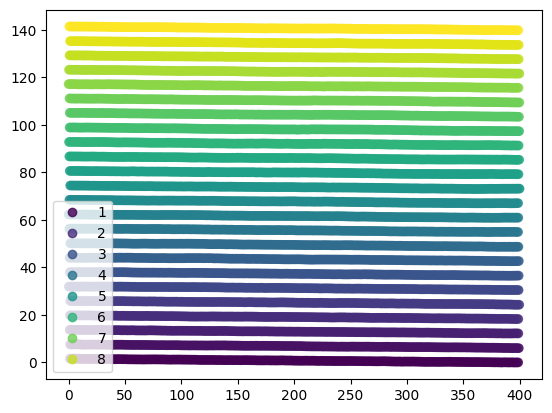

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = EastQuarter

labels, index = np.unique(df["Pass"], return_inverse=True)

fig, ax = plt.subplots()
sc = ax.scatter(df['Easting'], df['Northing'], marker = 'o', c = index, alpha = 0.8)
ax.legend(sc.legend_elements()[0], labels)
plt.show()

Now, we need to extract each pass as a functional data object - each pass is a single datum.



In [32]:

pass1 = df.loc[df['Pass'] == labels[1]]
pass1['Time'] = range(1,pass1.shape[0]+1)
pass1
pass1['YldVolDry']

 /var/folders/qc/904y514s1n50j35_ql9dhrkr0000gn/T/ipykernel_983/981399170.py:2: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


5851    179.11
5852    199.95
5853    218.02
5854    191.94
5855    170.90
         ...  
6102    215.69
6103    196.92
6104    207.43
6105    212.06
6106    192.74
Name: YldVolDry, Length: 256, dtype: float64

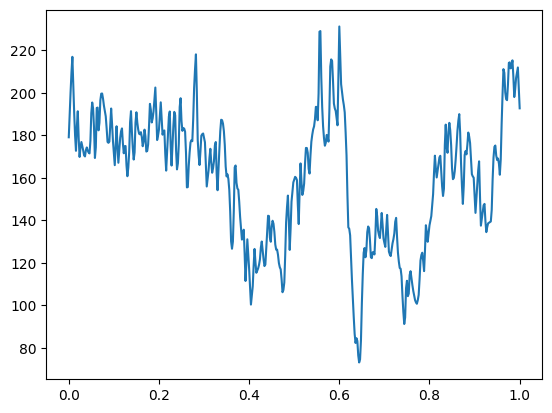

In [38]:
import skfda

fd = skfda.FDataGrid(
    data_matrix=pass1['YldVolDry']
)

fd.plot()
plt.show()

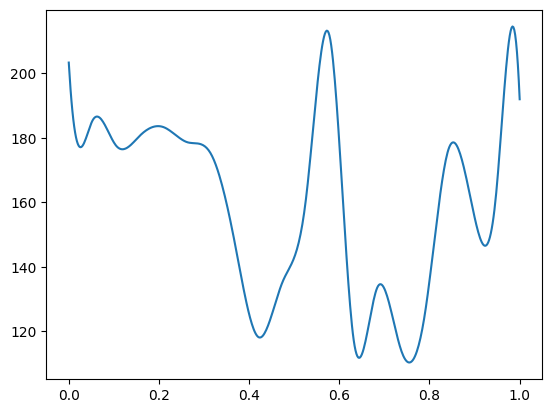

In [43]:
basis = skfda.representation.basis.VectorValued([
    skfda.representation.basis.BSpline(  # Second coordinate function
        n_basis=22,
        domain_range=fd.domain_range,
    )
])

fd_basis = fd.to_basis(basis)
fd_basis.plot()
plt.show()